<a href="https://colab.research.google.com/github/Vinh1207/Phan-Cao-Vinh/blob/main/FoodVNCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/database_food_VN/Train', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 600 images belonging to 10 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/database_food_VN/Test', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 60 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'Banh beo': 0,
 'Banh chung': 1,
 'Banh cuon': 2,
 'Banh gio': 3,
 'Banh mi': 4,
 'Banh pia': 5,
 'Banh trang nuong': 6,
 'Banh xeo': 7,
 'Bun dau mam tom': 8,
 'Nem chua': 9}

In [ ]:
test_set.class_indices

{'Banh beo': 0,
 'Banh chung': 1,
 'Banh cuon': 2,
 'Banh gio': 3,
 'Banh mi': 4,
 'Banh pia': 5,
 'Banh trang nuong': 6,
 'Banh xeo': 7,
 'Bun dau mam tom': 8,
 'Nem chua': 9}

In [ ]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(600, 128, 128, 3)
(600, 10)


In [ ]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(60, 128, 128, 3)
(60, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3), padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=100, verbose=1)

Epoch 1/100
60/60 [==============================] - 23s 369ms/step - loss: 2.3608 - accuracy: 0.0900
Epoch 2/100
60/60 [==============================] - 22s 368ms/step - loss: 2.3029 - accuracy: 0.0900
Epoch 3/100
60/60 [==============================] - 22s 362ms/step - loss: 2.3071 - accuracy: 0.1217
Epoch 4/100
60/60 [==============================] - 22s 375ms/step - loss: 2.3035 - accuracy: 0.1333
Epoch 5/100
60/60 [==============================] - 22s 360ms/step - loss: 2.2441 - accuracy: 0.1800
Epoch 6/100
60/60 [==============================] - 22s 363ms/step - loss: 1.9020 - accuracy: 0.3400
Epoch 7/100
60/60 [==============================] - 22s 364ms/step - loss: 1.2397 - accuracy: 0.6000
Epoch 8/100
60/60 [==============================] - 22s 362ms/step - loss: 0.6148 - accuracy: 0.8050
Epoch 9/100
60/60 [==============================] - 22s 363ms/step - loss: 0.2440 - accuracy: 0.9267
Epoch 10/100
60/60 [==============================] - 22s 362ms/step - loss: 0.113

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(x_train,y_train,verbose=2)
print('Sai số: ', Score[0])
print('Độ chính xác: ', Score[1])

19/19 - 6s - loss: 1.6093e-07 - accuracy: 1.0000 - 6s/epoch - 312ms/step
Sai số:  1.6093252952487092e-07
Độ chính xác:  1.0


<function matplotlib.pyplot.show(*args, **kw)>

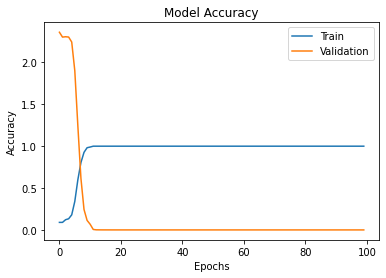

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhan_dien_FoodVN_CNN.h5")

In [ ]:
model_CNN=load_model("/content/drive/My Drive/Colab Notebooks/database_food_VN/Nhan_dien_FoodVN_CNN.h5")

In [ ]:
class_names = ["Bánh bèo", "Bánh chưng", "Bánh cuốn", "Bánh giò", "Bánh mì",
               "Bánh pía", "Bánh tráng nướng", "Bánh xèo", "Bún đậu mắm tôm", "Nem chua"]

1/1 [==============================] - 0s 34ms/step
[[4.2617245e-07 2.7634428e-08 4.7750298e-02 7.6740342e-10 2.3867301e-08
  1.9245285e-06 7.8413608e-03 4.0067935e-05 9.2745441e-01 1.6911475e-02]]
Kết quả:  Bún đậu mắm tôm
Độ chính xác:  0.9274544


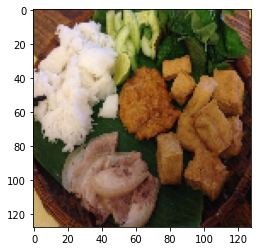

In [ ]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/My Drive/Colab Notebooks/database_food_VN/Train/Bun dau mam tom/bundautrain (10).jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 31ms/step
[[9.2923699e-04 1.7718053e-06 6.2062405e-04 1.2645719e-03 6.6197312e-01
  5.3512585e-09 2.2198152e-02 3.1232411e-01 7.8679113e-07 6.8777055e-04]]
Kết quả:  Bánh mì
Độ chính xác:  0.6619731


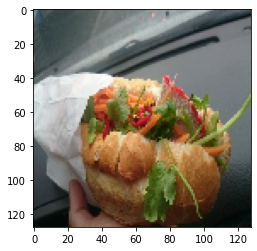

In [ ]:
url = "/content/drive/My Drive/Colab Notebooks/database_food_VN/Train/Banh mi/banhmitrain (12).jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)